In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
univariate_data = pd.read_csv("Assignment01/data1.txt", sep=' ')
univariate_data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [3]:
X = univariate_data['Population']
y = univariate_data['Profit']

Text(0, 0.5, 'City Profit')

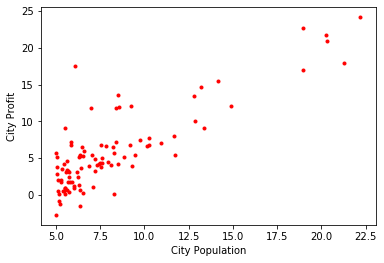

In [4]:
plt.scatter(X, y, c="red", marker=".")
plt.xlabel("City Population")
plt.ylabel("City Profit")

In [5]:
def decorate_data(X, y):
    X = np.array(X)
    y = np.array(y)
    m = X.shape[0]
    n = X[0].size
    X0 = np.ones((m, 1))
    X = np.array(X).reshape(m, n)
    X = np.concatenate((X0, X), axis=1)
    y = np.array(y).reshape(m, 1)
    theta = np.zeros((n + 1, 1))
    return theta, X, y

In [6]:
def hypothesis(theta, X):
    return X.dot(theta)

In [7]:
def cost_function(theta, X, y):
    m = X.shape[0]
    error = hypothesis(theta, X) - y
    squared_error = error ** 2
    return np.sum(squared_error) / (2 * m)

In [8]:
def gradient(theta, X, y):
    m = X.shape[0]
    return X.T.dot(hypothesis(theta, X) - y) / m

In [9]:
def gradient_descent(theta, X, y, learning_rate, iterations):
    history = {'cost': [], 'parameter': []}
    history['cost'].append(cost_function(theta, X, y))
    history['parameter'].append(theta)
    for i in range(iterations):
        theta = theta - learning_rate * gradient(theta, X, y)
        history['cost'].append(cost_function(theta, X, y))
        history['parameter'].append(theta)
    return history, theta

In [10]:
theta, X, y = decorate_data(X, y)

In [11]:
history, trained_theta = gradient_descent(theta, X, y, 0.001, 21000)

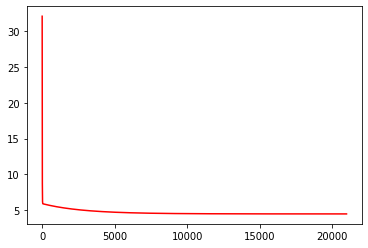

In [12]:
plt.plot(history['cost'], c="red")

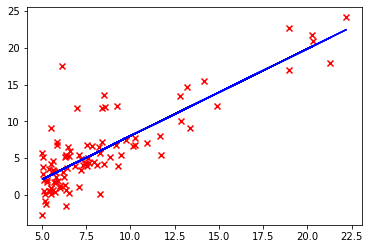

In [13]:
plt.scatter(univariate_data['Population'], univariate_data['Profit'], c='red', marker='x')
x_value=[x for x in univariate_data['Population']]
y_value=[y * trained_theta[1] + trained_theta[0] for y in x_value]
plt.plot(x_value, y_value, color = "blue")

In [14]:
multivariate_data = pd.read_csv("./Assignment01/data2.txt", sep=' ')
print(multivariate_data.head())
multivariate_data.describe()

   Area  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


,Area,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [15]:
X = multivariate_data.iloc[:, :-1]
y = multivariate_data.iloc[:, -1]

In [16]:
data_properties = {}
for i in X.columns:
    mean = X[i].mean()
    standard_deviation = X[i].std()
    data_properties[i] = {'mean' : mean, 'std' : standard_deviation}
    X[i] = (X[i] - mean) / standard_deviation
print(data_properties)

{'Area': {'mean': 2000.6808510638298, 'std': 794.7023535338897}, 'Bedrooms': {'mean': 3.1702127659574466, 'std': 0.7609818867800998}}


In [17]:
theta, X, y = decorate_data(X, y)

In [18]:
history, trained_theta = gradient_descent(theta, X, y, 0.01, 1000)

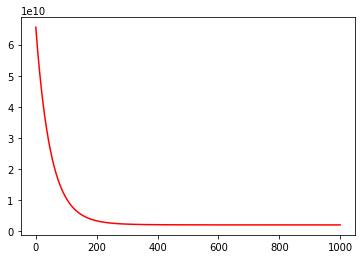

In [19]:
plt.plot(history['cost'], c="red")

### Normal Equations

In [20]:
theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([[340412.65957447],
       [110631.05027885],
       [ -6649.47427082]])